## 1.Introduction

House Prices dataset has the advantage to use advanced regression techniques and using experimental feature engineering techniques with 79 explanatory variables. 

This dataset contains every aspect of residential homes in Ames, Iowa and this notebook aims to use feature engineering techniques with 79 explanatory variables and make predictions with using advanced regression techniques. 

There are some techniques included in this notebook like box-cox transformation, creating a stack model and blending for final results, scaler methods to achieve low error numbers, etc. The goal of this notebook is to use advanced regression methods with its parameters and achieve the lowest error by eliminating correct features, encoding with the right methods, and using right hyperparameters for each algorithm.

This notebook has 5 topics:

* Exploratory Analysis
* Feature Engineering 
* Hyperparameter Tunning 
* Model Building 
* Model Results

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR

from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## 2. Exploratory Analysis

In this part, test and train datasets have been merged to make analysis easier and outliers have been eliminated. Some visualizations which have been made for to understand data better, created with Tableau and embedded with magic commands. 

In [3]:
house_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
house_data_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
%%html
<div class='tableauPlaceholder' id='viz1596496128727' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType_15964960993330&#47;ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType_15964960993330&#47;ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType_15964960993330&#47;ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596496128727');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [7]:
%%html
<div class='tableauPlaceholder' id='viz1596394330833' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ComparingRemodelHousesSalePrices&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ComparingRemodelHousesSalePrices&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ComparingRemodelHousesSalePrices&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596394330833');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Text(0.5, 1.0, 'Building Types')

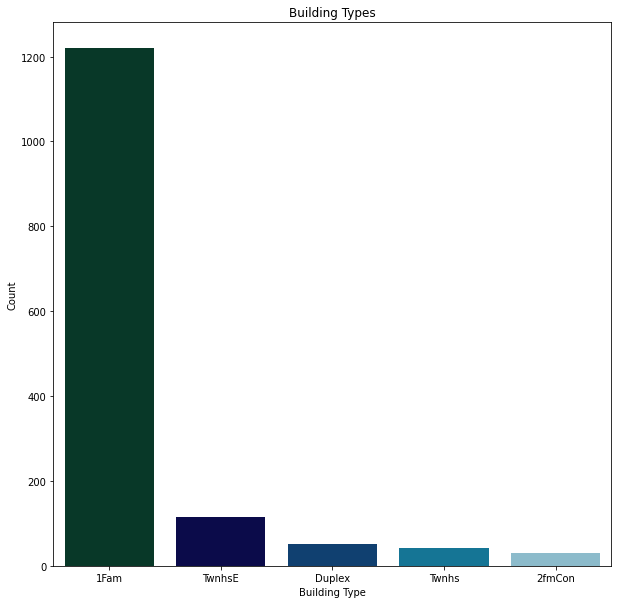

In [8]:
plt.figure(figsize=(10, 10))
sns.countplot(house_data['BldgType'], palette= 'ocean', order =pd.value_counts(house_data['BldgType']).index)
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.title('Building Types')

In [9]:
%%html
<div class='tableauPlaceholder' id='viz1596394360236' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalePricevsNeighborhoodvsBuildingType&#47;SalePricevsNeighborhoodvsBuildingType&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SalePricevsNeighborhoodvsBuildingType&#47;SalePricevsNeighborhoodvsBuildingType' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalePricevsNeighborhoodvsBuildingType&#47;SalePricevsNeighborhoodvsBuildingType&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596394360236');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [10]:
%%html
<div class='tableauPlaceholder' id='viz1596394632209' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ye&#47;YearvsSalevsOverallCondition&#47;YearvsSalevsOverallCondition&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='YearvsSalevsOverallCondition&#47;YearvsSalevsOverallCondition' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ye&#47;YearvsSalevsOverallCondition&#47;YearvsSalevsOverallCondition&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596394632209');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [11]:
%%html
<div class='tableauPlaceholder' id='viz1596394683145' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;House_Sales&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='House_Sales&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;House_Sales&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596394683145');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### 2.1 Outliers

Last part of this topic is detecting outliers and eliminate it. There is one outlier that was defined in 'Ames Housing dataset' paper (http://jse.amstat.org/v19n3/decock.pdf). That value has been eliminated before feature engineering.

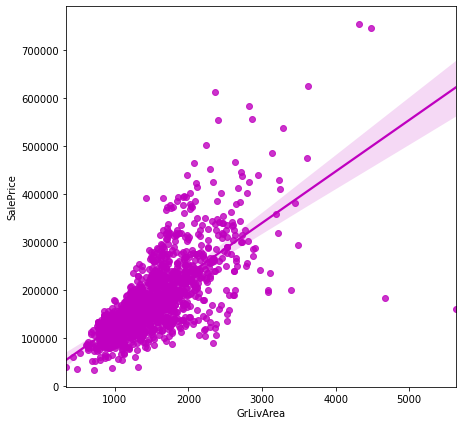

In [12]:
plt.figure(figsize=(7,7))
sns.regplot(house_data['GrLivArea'],house_data['SalePrice'],color='m')

In [13]:
house_data[(house_data['GrLivArea']>5000)& (house_data['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [14]:
#Delete Outliers
house_data = house_data.drop(house_data[(house_data['GrLivArea']>5000)& (house_data['SalePrice']<200000)].index)

Before the feature engineering part, train and test data have been merged. Thus, the analysis have been done for both dataset at once.

In [15]:
#Merge Train and Test dataset for feature engineering

house_all_data = pd.concat([house_data, house_data_test], axis=0)
house_all_data[:1459]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


## 3. Feature Engineering

In this part, there are some importants methods have been implemented. Such as;

* Dealing with missing values,
* Seperating categorical and numerical values
* Proper encoding method has been implemented to the categorical variables.
* Correlation matrix has been build for numerical variables and chech is there any high correlated features.
* Box-Cox transformation has been implemented to numerical data which are skewed.
* Log transformation has been implemented to the `Sale Price` feature.

First part is finding missing values for each feature

In [16]:
#Finding missing values
null_list = house_all_data.isnull().sum()

def find_null_values(list):
    for name, value in list.items():
        if value != 0:
            print(name, value)
print(find_null_values(null_list))

MSZoning 4
LotFrontage 486
Alley 2720
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
MasVnrArea 23
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinSF1 1
BsmtFinType2 80
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageCars 1
GarageArea 1
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2347
MiscFeature 2813
SaleType 1
SalePrice 1459
None


In [17]:
# Fill missing data

#Dealing with numerical missing data
house_all_data['LotFrontage'] = house_all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

#Fill missing data with 0
for col in ('MasVnrArea', 'GarageYrBlt'):
    house_all_data[col] = house_all_data[col].fillna(0)

#Change their type to int

for col in ('LotFrontage', 'MasVnrArea', 'GarageYrBlt'):
    house_all_data[col] = house_all_data[col].astype(int)

    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath',
            'GarageCars','GarageArea'):
    house_all_data[col] = house_all_data[col].fillna(0)

#Some Categorical Variables are already written as NA in original data 
#but seems like there is count as a missing data. 
#Replace the values as "not_applicable"

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2', 'FireplaceQu','GarageType',
            'GarageFinish','GarageQual','GarageCond', 'Fence', 'Alley', 'PoolQC', 'MiscFeature'):
    house_all_data[col] = house_all_data[col].fillna('not_applicable')

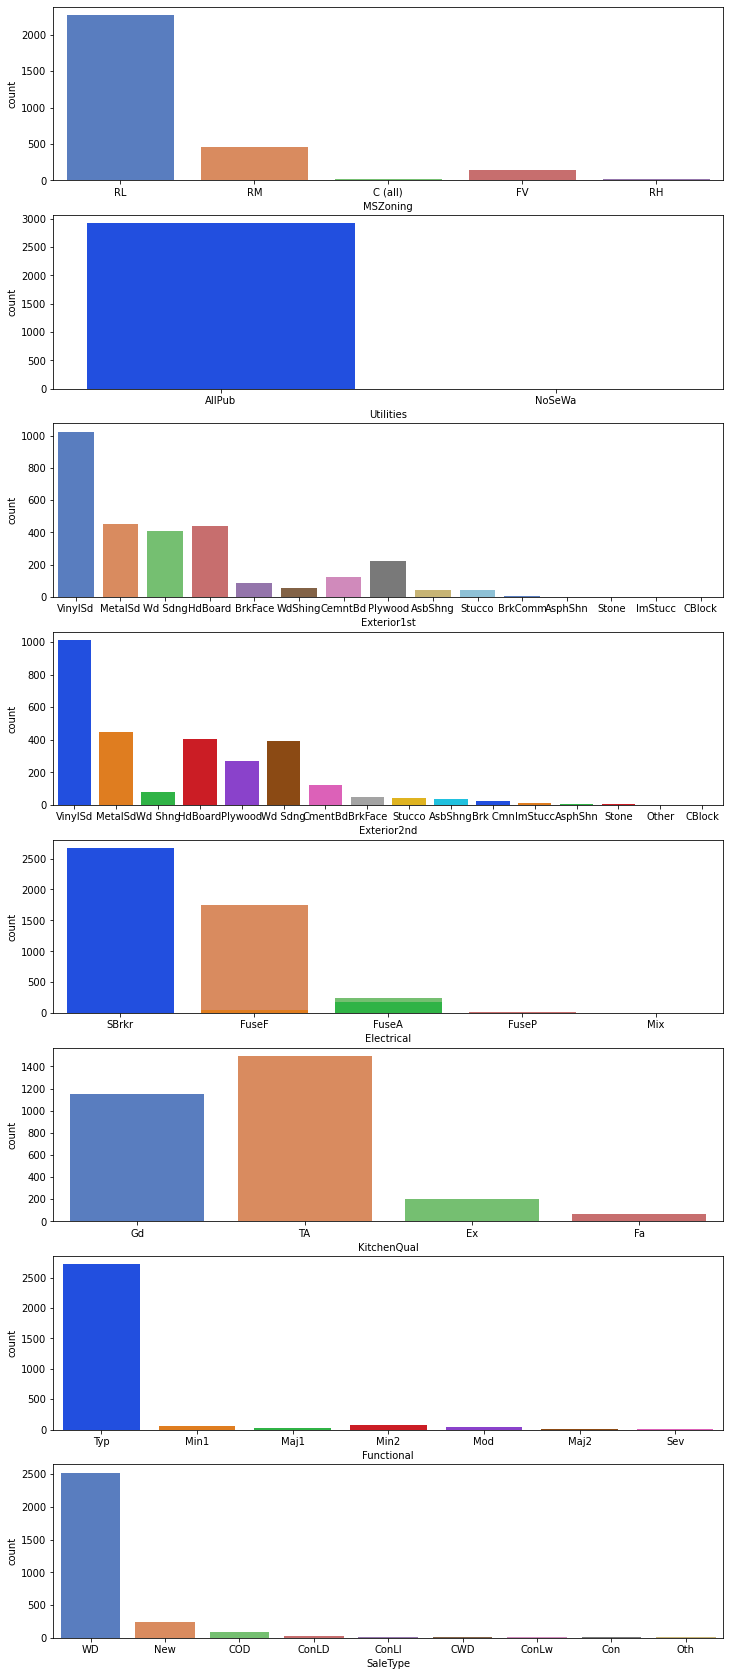

In [18]:
#Dealing with categorical missing data

#First create countplot to see details of them

fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(8,1,figsize=(12,30))

sns.countplot(house_all_data['MSZoning'], ax=ax1, palette='muted')
sns.countplot(house_all_data['Utilities'], ax=ax2, palette='bright')
sns.countplot(house_all_data['Exterior1st'], ax=ax3, palette='muted')
sns.countplot(house_all_data['Exterior2nd'], ax=ax4, palette='bright')
sns.countplot(house_all_data['MasVnrType'], ax=ax5, palette='muted')
sns.countplot(house_all_data['Electrical'], ax=ax5, palette='bright')
sns.countplot(house_all_data['KitchenQual'], ax=ax6, palette='muted')
sns.countplot(house_all_data['Functional'], ax=ax7, palette='bright')
sns.countplot(house_all_data['SaleType'], ax=ax8, palette='muted')
plt.show()

In [19]:
house_all_data['Utilities'].value_counts()

AllPub    2915
NoSeWa       1
Name: Utilities, dtype: int64

Based on the above graphs, all categorical missing values can replace with the most frequent one, except the 'Utilities' feature. 99% of all values of Utilities are 'AllPub'. This feature can be removed from the data. I will do it in later parts.

In [20]:
#Replace with most
for col in ('MSZoning', 'Exterior1st', 'Exterior2nd','MasVnrType','Electrical', 'KitchenQual',
            'Functional','SaleType'):
    house_all_data[col] = house_all_data[col].fillna(house_all_data[col].mode()[0])

In this part, I would like to create new features. Most of them are similar with what other kagglers did too.
* `Total_SF` feature created by `Total Basement`, `First Floor Square Feet` and `Second Floor Square Feet`
* `Additional_Area` feature created by `Garage Area` and `Pool Area`
* `Total_Bathroom` feature created by `Basement Full Bath`, `Basement Half Bath`, `Full Bath`, and 'Half Bath`
* `Total_PorchSF` feature created by square feet of  `Open Porch`, `Enclosed Porch`, `3 Season Porch`, `Screen Porch`, and `Wood Deck` 

In [21]:
#Create new features

#'Total Square' feet by TotalBsmtSF, 1stFlrSF, 2ndFlrSF
house_all_data['Total_SF'] = house_all_data['TotalBsmtSF'] + house_all_data['1stFlrSF'] + house_all_data['2ndFlrSF']

#'Additional area' by 'GarageArea' and 'PoolArea'
house_all_data['Additional_Area'] = house_all_data['GarageArea'] + house_all_data['PoolArea']

#'Total_Bathroom' by 'BsmtFullBath','BsmtHalfBath', 'FullBath', and 'HalfBath'
house_all_data['Total_Bathroom'] = house_all_data['BsmtFullBath'] + house_all_data['BsmtHalfBath'] + \
                                   house_all_data['FullBath'] + house_all_data['HalfBath']

#'Total_Porch' by 'OpenPorchSF','EnclosedPorch', '3SsnPorch', and 'ScreenPorch'
house_all_data['Total_PorchSF'] = house_all_data['OpenPorchSF'] + house_all_data['EnclosedPorch'] + \
                                  house_all_data['3SsnPorch'] + house_all_data['ScreenPorch'] + \
                                  house_all_data['WoodDeckSF']

Another features were created as a categoric variable. Such as, if there is a `fireplaces` then these variables assigned as yes (1) otherwise assigned as no (0)
This implementation has been made to `Remodel`, `Fireplace`, `Pool`, `Basement`, `Garage`, and `2nd floor` features. 

In [22]:
#Create some feeatures with 1 or 0 
house_all_data['remodel_year'] = house_all_data['YearRemodAdd'] - house_all_data['YearBuilt']
house_all_data ['Remodel_yn'] = house_all_data['remodel_year'].apply(lambda x: 1 if x > 0 else 0)
house_all_data['Fireplace_yn'] = house_all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
house_all_data['Pool_yn'] = house_all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
house_all_data['Basement_yn'] = house_all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house_all_data['Garage_yn'] = house_all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house_all_data['Garage_car_yn'] = house_all_data['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
house_all_data['2ndfloor_yn'] = house_all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

Lets visualize this new features' relation with `SalePrice`. 
Since, there is no `SalePrice` data in test data, below visualization made by train dataset

In [23]:
%%html
<div class='tableauPlaceholder' id='viz1596495721781' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType&#47;Sheet6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType&#47;Sheet6' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;ComparingHousePricesandTotalHouseSquareFeetbyHouseFoundationType&#47;Sheet6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596495721781');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Categorical Features
Below graphs is show relationship with `SalePrice` and categorical features

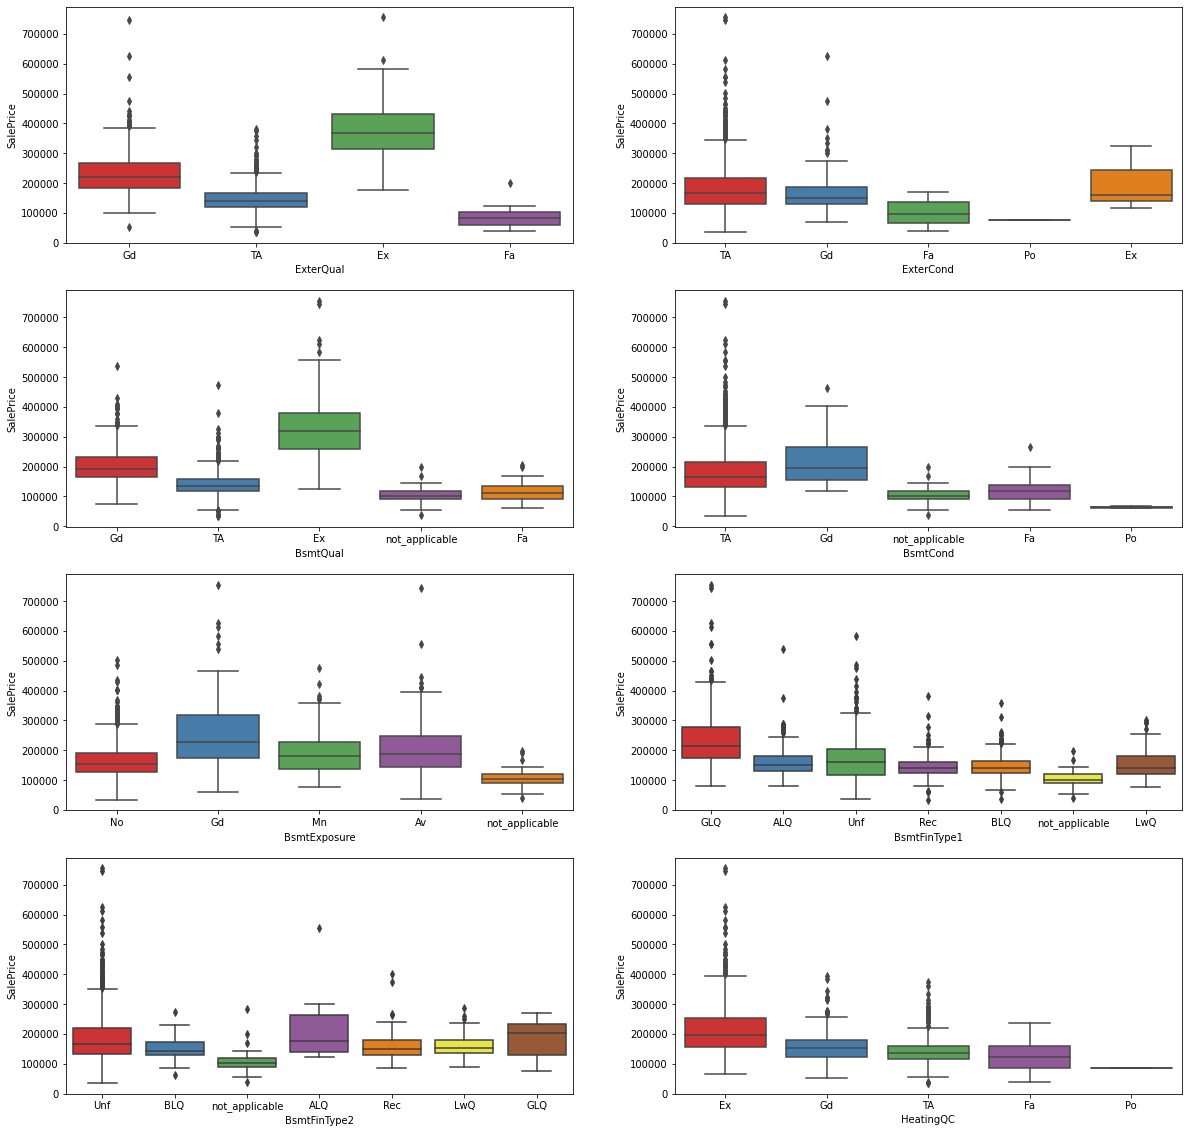

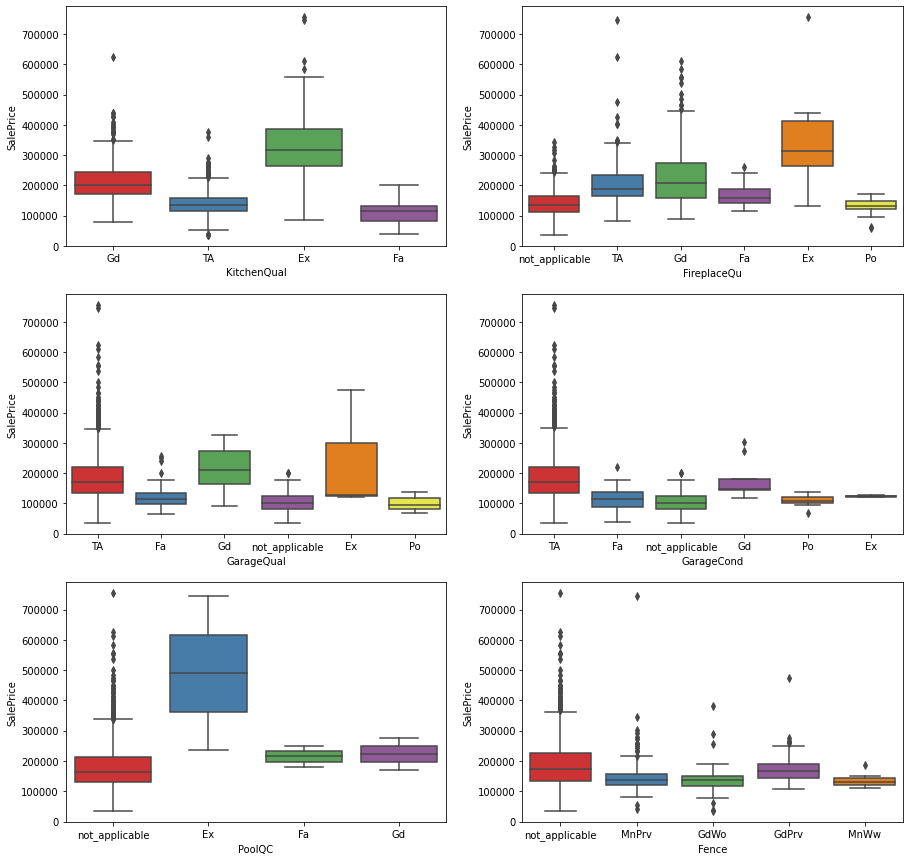

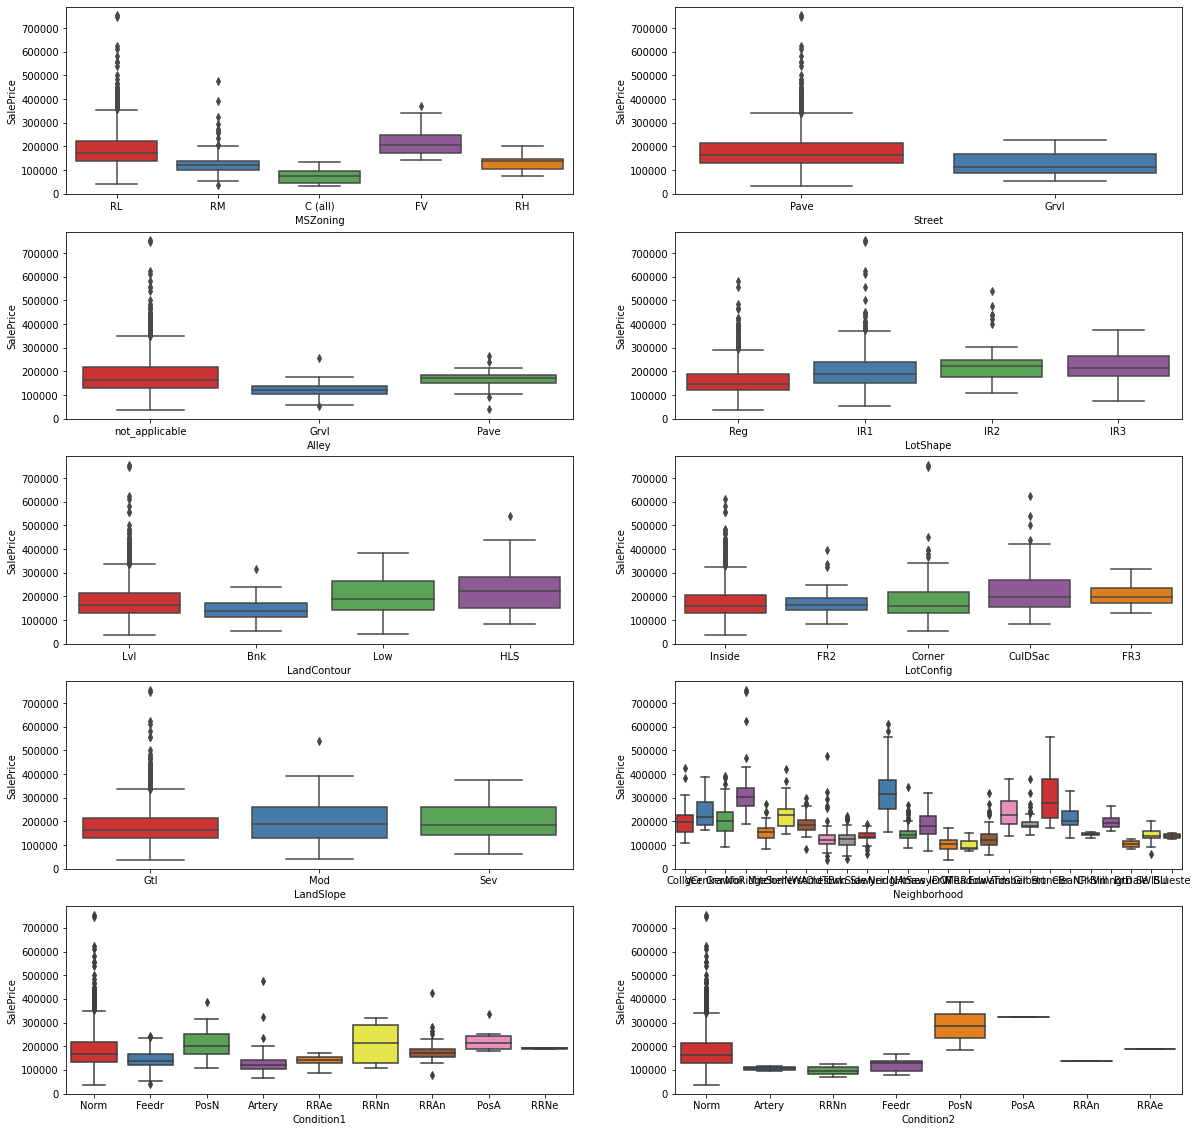

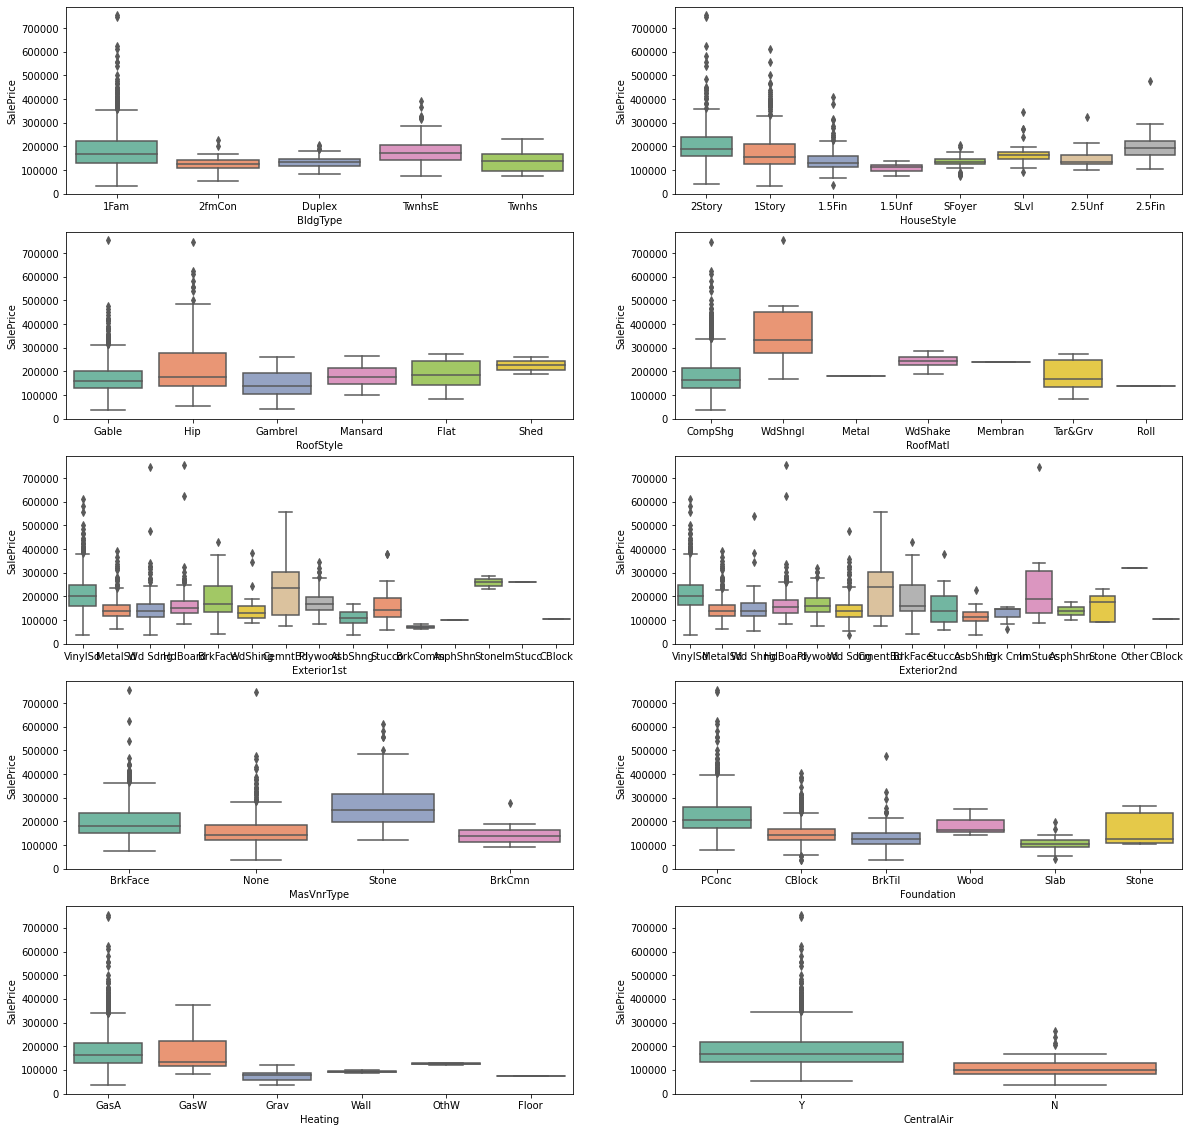

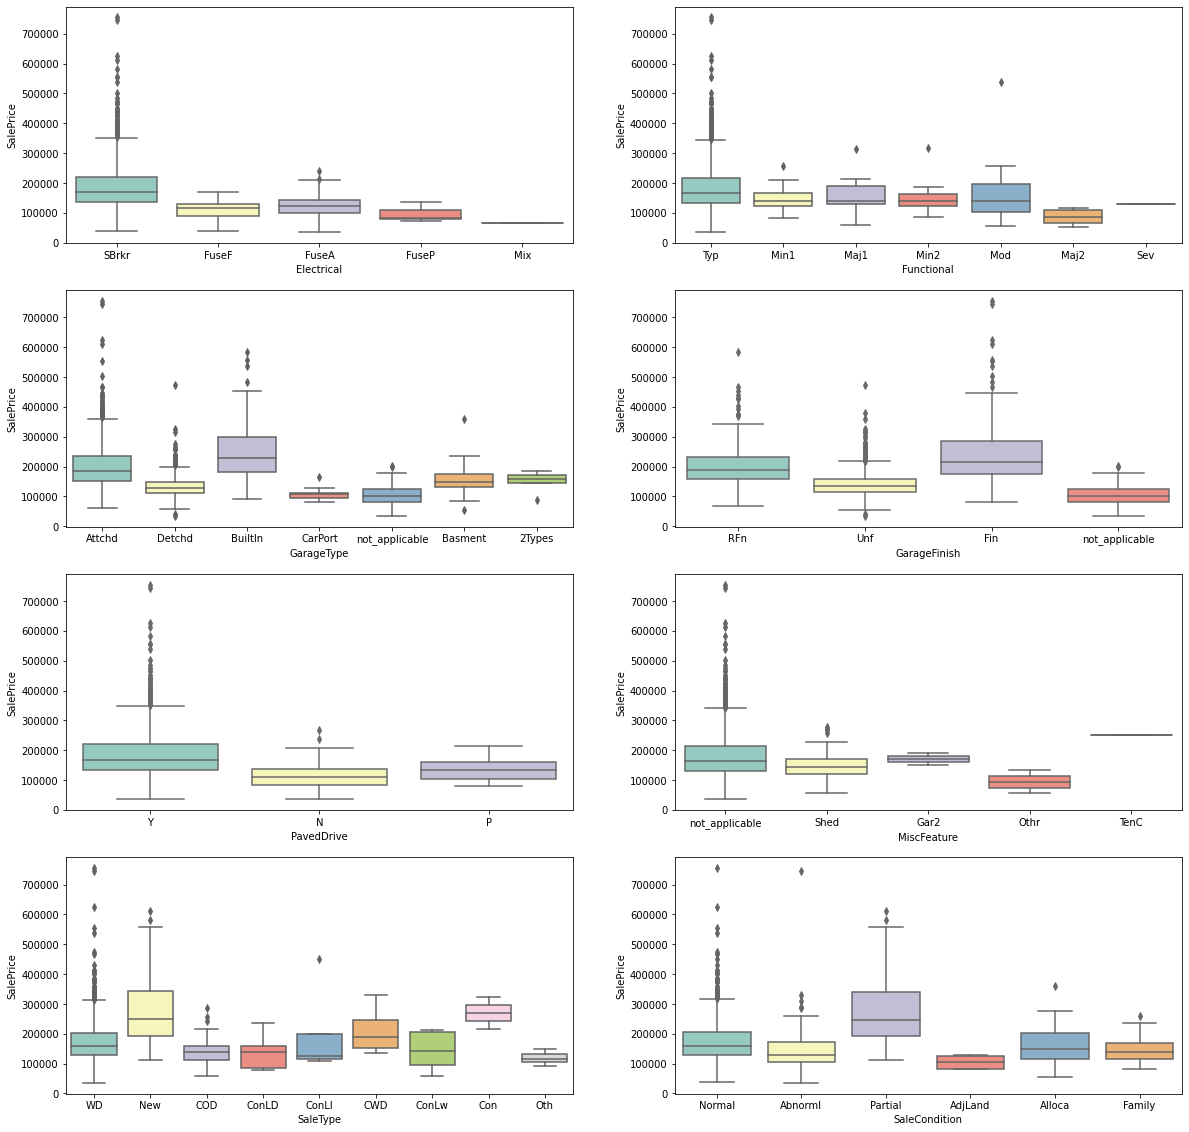

In [24]:
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(20,20))
sns.boxplot(house_all_data['ExterQual'],house_all_data['SalePrice'],ax=ax1, palette='Set1')
sns.boxplot(house_all_data['ExterCond'],house_all_data['SalePrice'],ax=ax2,palette='Set1')
sns.boxplot(house_all_data['BsmtQual'],house_all_data['SalePrice'],ax=ax3,palette='Set1')
sns.boxplot(house_all_data['BsmtCond'],house_all_data['SalePrice'],ax=ax4, palette='Set1')
sns.boxplot(house_all_data['BsmtExposure'],house_all_data['SalePrice'],ax=ax5, palette='Set1')
sns.boxplot(house_all_data['BsmtFinType1'],house_all_data['SalePrice'],ax=ax6, palette='Set1')
sns.boxplot(house_all_data['BsmtFinType2'],house_all_data['SalePrice'],ax=ax7, palette='Set1')
sns.boxplot(house_all_data['HeatingQC'],house_all_data['SalePrice'],ax=ax8, palette='Set1')

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(15,15))
sns.boxplot(house_all_data['KitchenQual'],house_all_data['SalePrice'],ax=ax1, palette='Set1')
sns.boxplot(house_all_data['FireplaceQu'],house_all_data['SalePrice'],ax=ax2,palette='Set1')
sns.boxplot(house_all_data['GarageQual'],house_all_data['SalePrice'],ax=ax3,palette='Set1')
sns.boxplot(house_all_data['GarageCond'],house_all_data['SalePrice'],ax=ax4, palette='Set1')
sns.boxplot(house_all_data['PoolQC'],house_all_data['SalePrice'],ax=ax5, palette='Set1')
sns.boxplot(house_all_data['Fence'],house_all_data['SalePrice'],ax=ax6, palette='Set1')

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2,figsize=(20,20))
sns.boxplot(house_all_data['MSZoning'],house_all_data['SalePrice'],ax=ax1, palette='Set1')
sns.boxplot(house_all_data['Street'],house_all_data['SalePrice'],ax=ax2,palette='Set1')
sns.boxplot(house_all_data['Alley'],house_all_data['SalePrice'],ax=ax3,palette='Set1')
sns.boxplot(house_all_data['LotShape'],house_all_data['SalePrice'],ax=ax4, palette='Set1')
sns.boxplot(house_all_data['LandContour'],house_all_data['SalePrice'],ax=ax5, palette='Set1')
sns.boxplot(house_all_data['LotConfig'],house_all_data['SalePrice'],ax=ax6, palette='Set1')
sns.boxplot(house_all_data['LandSlope'],house_all_data['SalePrice'],ax=ax7, palette='Set1')
sns.boxplot(house_all_data['Neighborhood'],house_all_data['SalePrice'],ax=ax8, palette='Set1')
sns.boxplot(house_all_data['Condition1'],house_all_data['SalePrice'],ax=ax9, palette='Set1')
sns.boxplot(house_all_data['Condition2'],house_all_data['SalePrice'],ax=ax10, palette='Set1')

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8), (ax9, ax10)) = plt.subplots(5,2,figsize=(20,20))
sns.boxplot(house_all_data['BldgType'],house_all_data['SalePrice'],ax=ax1, palette='Set2')
sns.boxplot(house_all_data['HouseStyle'],house_all_data['SalePrice'],ax=ax2,palette='Set2')
sns.boxplot(house_all_data['RoofStyle'],house_all_data['SalePrice'],ax=ax3,palette='Set2')
sns.boxplot(house_all_data['RoofMatl'],house_all_data['SalePrice'],ax=ax4, palette='Set2')
sns.boxplot(house_all_data['Exterior1st'],house_all_data['SalePrice'],ax=ax5, palette='Set2')
sns.boxplot(house_all_data['Exterior2nd'],house_all_data['SalePrice'],ax=ax6, palette='Set2')
sns.boxplot(house_all_data['MasVnrType'],house_all_data['SalePrice'],ax=ax7, palette='Set2')
sns.boxplot(house_all_data['Foundation'],house_all_data['SalePrice'],ax=ax8, palette='Set2')
sns.boxplot(house_all_data['Heating'],house_all_data['SalePrice'],ax=ax9, palette='Set2')
sns.boxplot(house_all_data['CentralAir'],house_all_data['SalePrice'],ax=ax10, palette='Set2')

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(20,20))
sns.boxplot(house_all_data['Electrical'],house_all_data['SalePrice'],ax=ax1, palette='Set3')
sns.boxplot(house_all_data['Functional'],house_all_data['SalePrice'],ax=ax2,palette='Set3')
sns.boxplot(house_all_data['GarageType'],house_all_data['SalePrice'],ax=ax3,palette='Set3')
sns.boxplot(house_all_data['GarageFinish'],house_all_data['SalePrice'],ax=ax4, palette='Set3')
sns.boxplot(house_all_data['PavedDrive'],house_all_data['SalePrice'],ax=ax5, palette='Set3')
sns.boxplot(house_all_data['MiscFeature'],house_all_data['SalePrice'],ax=ax6, palette='Set3')
sns.boxplot(house_all_data['SaleType'],house_all_data['SalePrice'],ax=ax7, palette='Set3')
sns.boxplot(house_all_data['SaleCondition'],house_all_data['SalePrice'],ax=ax8, palette='Set3')

Let's look closer to some categorical features. Some of them may be dropped. 

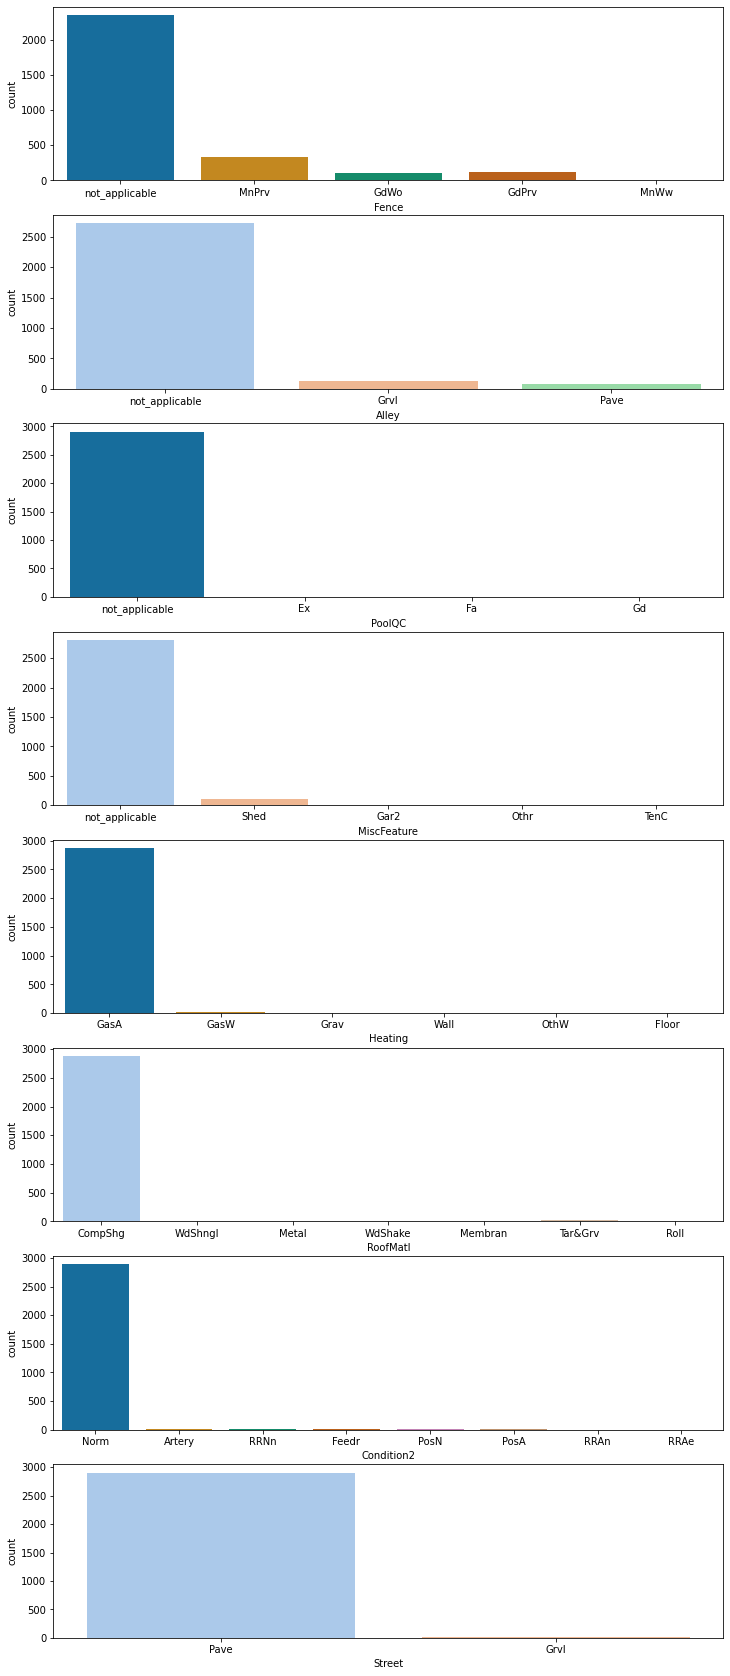

In [25]:
fig, (ax1, ax2, ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(8,1,figsize=(12,30))

sns.countplot(house_all_data['Fence'], ax=ax1, palette='colorblind')
sns.countplot(house_all_data['Alley'], ax=ax2, palette='pastel')
sns.countplot(house_all_data['PoolQC'], ax=ax3, palette='colorblind')
sns.countplot(house_all_data['MiscFeature'], ax=ax4, palette='pastel')
sns.countplot(house_all_data['Heating'], ax=ax5, palette='colorblind')
sns.countplot(house_all_data['RoofMatl'], ax=ax6, palette='pastel')
sns.countplot(house_all_data['Condition2'], ax=ax7, palette='colorblind')
sns.countplot(house_all_data['Street'], ax=ax8, palette='pastel')
plt.show()

In [26]:
house_all_data[house_all_data['remodel_year'] < 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Total_Bathroom,Total_PorchSF,remodel_year,Remodel_yn,Fireplace_yn,Pool_yn,Basement_yn,Garage_yn,Garage_car_yn,2ndfloor_yn
416,1877,20,RL,65,10739,Pave,not_applicable,IR1,Lvl,AllPub,...,3.0,184,-1,0,0,0,1,1,1,0


In [27]:
house_all_data.loc[house_all_data['remodel_year'] == -1, 'remodel_year'] = 1

In [28]:
house_all_data.loc[house_all_data['Id'] == 1877, 'Remodel_yn'] = 1

In [29]:
house_all_data.loc[416]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Total_Bathroom,Total_PorchSF,remodel_year,Remodel_yn,Fireplace_yn,Pool_yn,Basement_yn,Garage_yn,Garage_car_yn,2ndfloor_yn
416,417,60,RL,74,7844,Pave,not_applicable,Reg,Lvl,AllPub,...,2.0,0,0,0,1,0,1,1,1,1
416,1877,20,RL,65,10739,Pave,not_applicable,IR1,Lvl,AllPub,...,3.0,184,1,1,0,0,1,1,1,0


Based on the above graphs, `PoolQC`, `Heating`, `RoofMat1`, `Condition2`, and `Street` features dropped in addition to `Id` and `Utilities`

In [30]:
house_all_data = house_all_data.drop([ 'Id', 'Utilities','PoolQC', 'Heating', 'RoofMatl', 'Condition2', 'Street'], axis=1) 

#### Label Encoding

In this part, the Label encoding method has been implemented for some categorical variables. Also, some numerical variables such as `MsSubClass`, `OverallCond`, `YrSold`, and `MoSold` have been converted as a categorical variable to better analysis. 

In [31]:
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    house_all_data[col] = house_all_data[col].astype('str')

In [32]:
label_encoding_feat = ('ExterQual', 'ExterCond', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                       'BsmtFinType2','HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual','GarageCond',
                       'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold','MoSold',
                      'Remodel_yn','Fireplace_yn','Pool_yn','Basement_yn', 'Garage_yn', '2ndfloor_yn', 'Garage_car_yn')
for feat in label_encoding_feat:
    labelencoder = LabelEncoder()
    house_all_data[feat] = labelencoder.fit_transform((house_all_data[feat].values))

Another method is implementing one-hot encoding to the rest of the categorical variables. 

#### One-hot encoding

In [33]:
#One hot encoding
def one_hot_encoding(dataset, feature):
    dummy_dataset = pd.get_dummies(dataset[[feature]])
    encode_dataset = pd.concat([dataset, dummy_dataset], axis=1)
    encode_dataset = encode_dataset.drop([feature], axis=1)
    return(encode_dataset)

In [34]:
encoding_features = ['MSZoning', 'LandContour', 'LotConfig','BldgType', 'HouseStyle','RoofStyle',
                     'MasVnrType', 'Foundation', 'Electrical','GarageType','SaleCondition', 'SaleType', 
                     'Functional','GarageFinish', 'LandSlope', 'Condition1', 'Neighborhood','Exterior1st',
                     'Exterior2nd', 'Fence', 'Alley', 'MiscFeature' ]

for feature in encoding_features:
    house_all_data = one_hot_encoding(house_all_data, feature)


In [35]:
house_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Columns: 226 entries, MSSubClass to MiscFeature_not_applicable
dtypes: float64(12), int64(52), uint8(162)
memory usage: 2.0 MB


#### Numerical Features

In this part, numerical features have been analyzed. First, a correlation matrix created. Then, the relationship with `SalePrice` visualized.

In [36]:
#Create Dataset with only Numerical Features

house_numerical_data = house_all_data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
                                       'BsmtHalfBath','GarageCars','GarageArea','Total_SF','Additional_Area','LotFrontage',
                                       'LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','1stFlrSF',
                                       '2ndFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr',
                                       'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF',
                                       'OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal',
                                       'Total_Bathroom','Total_PorchSF','remodel_year','SalePrice']]

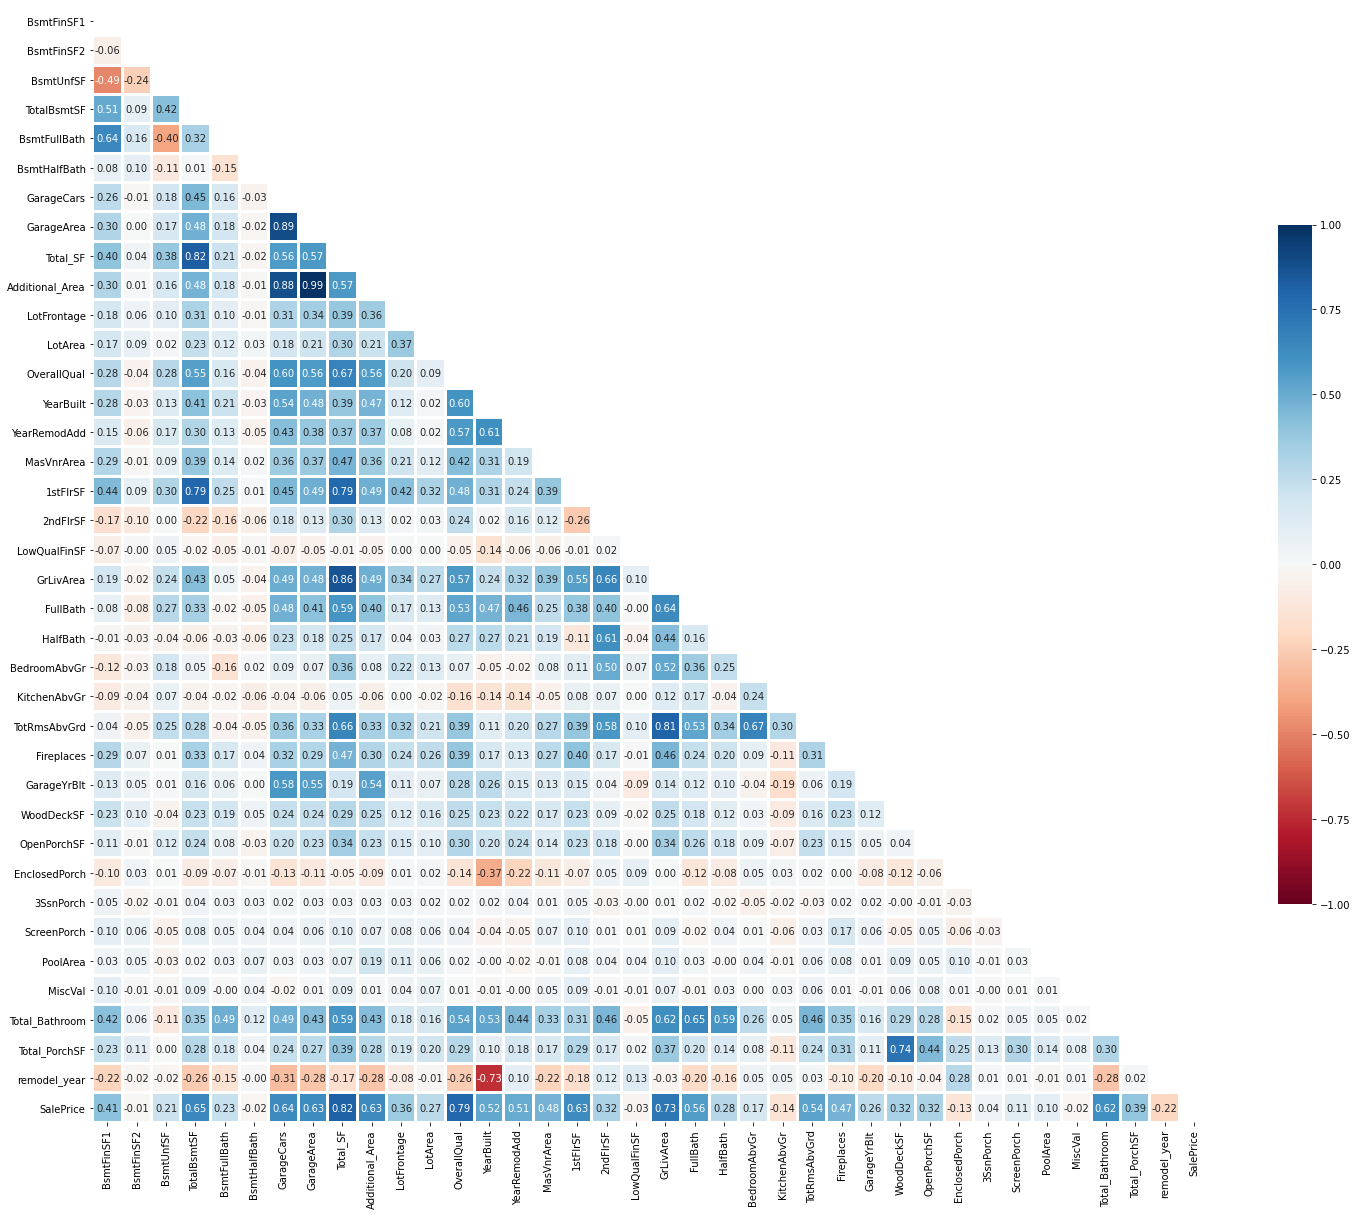

In [37]:
corr=house_numerical_data.corr(method='pearson')
plt.figure(figsize=(25, 25))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
palette = sns.diverging_palette(50, 200, n=256)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', mask= mask, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5})

In [38]:
#If any correlation higher than 90%
corr_mask_numerical = corr.mask(mask)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_numerical)

['GarageArea']


Based on the correlation matrix, `GarageArea` feature has high correlation with `Additional Area` feature. `GarageArea` feature will be dropped.

Below graphs show numerical features' relationship with `SalePrice` feature

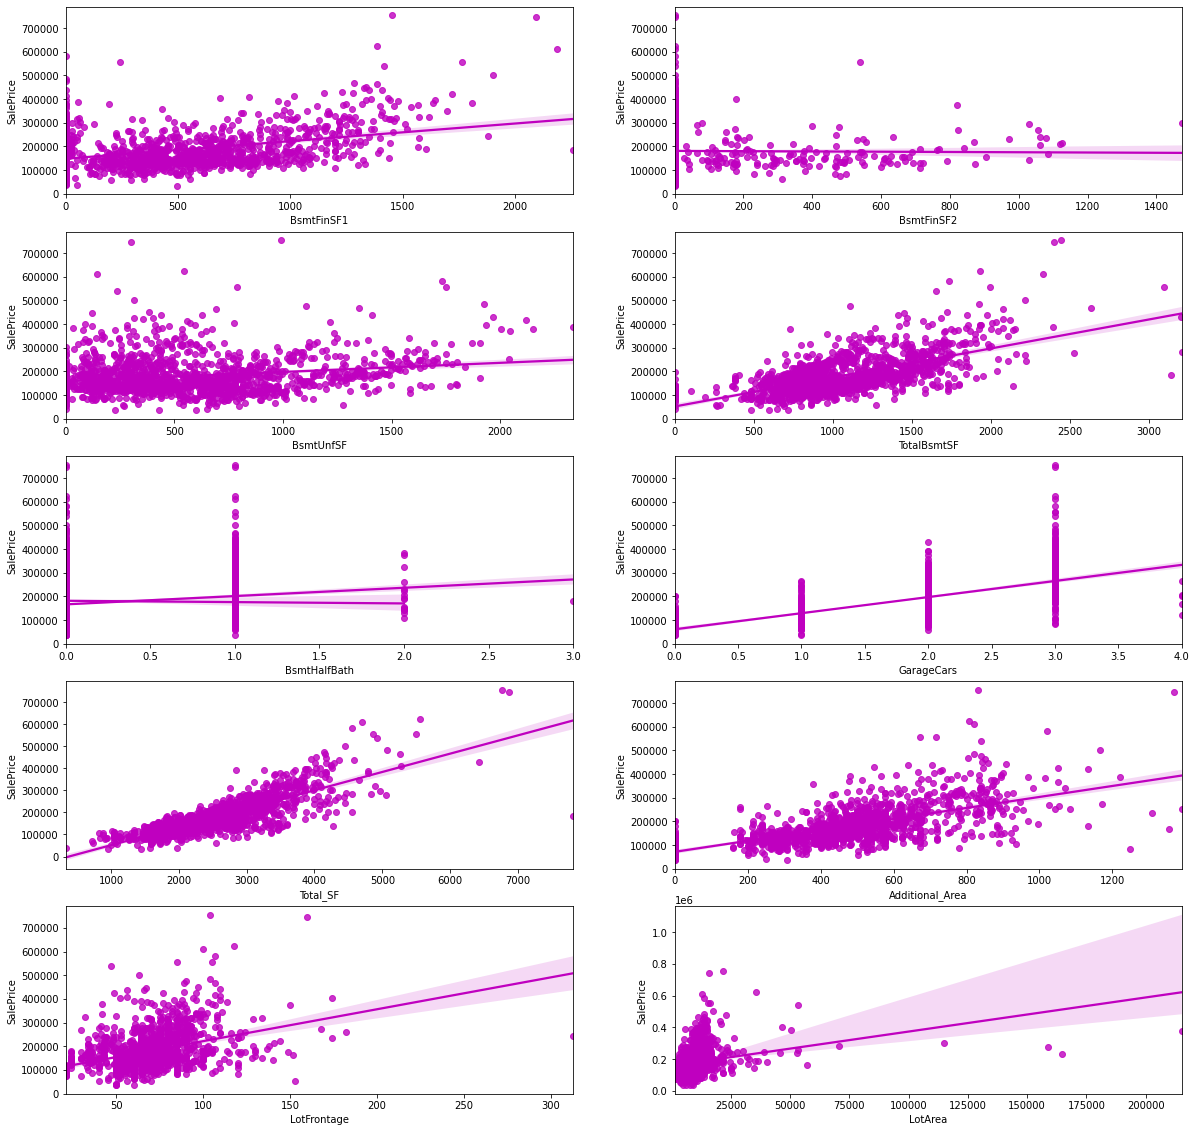

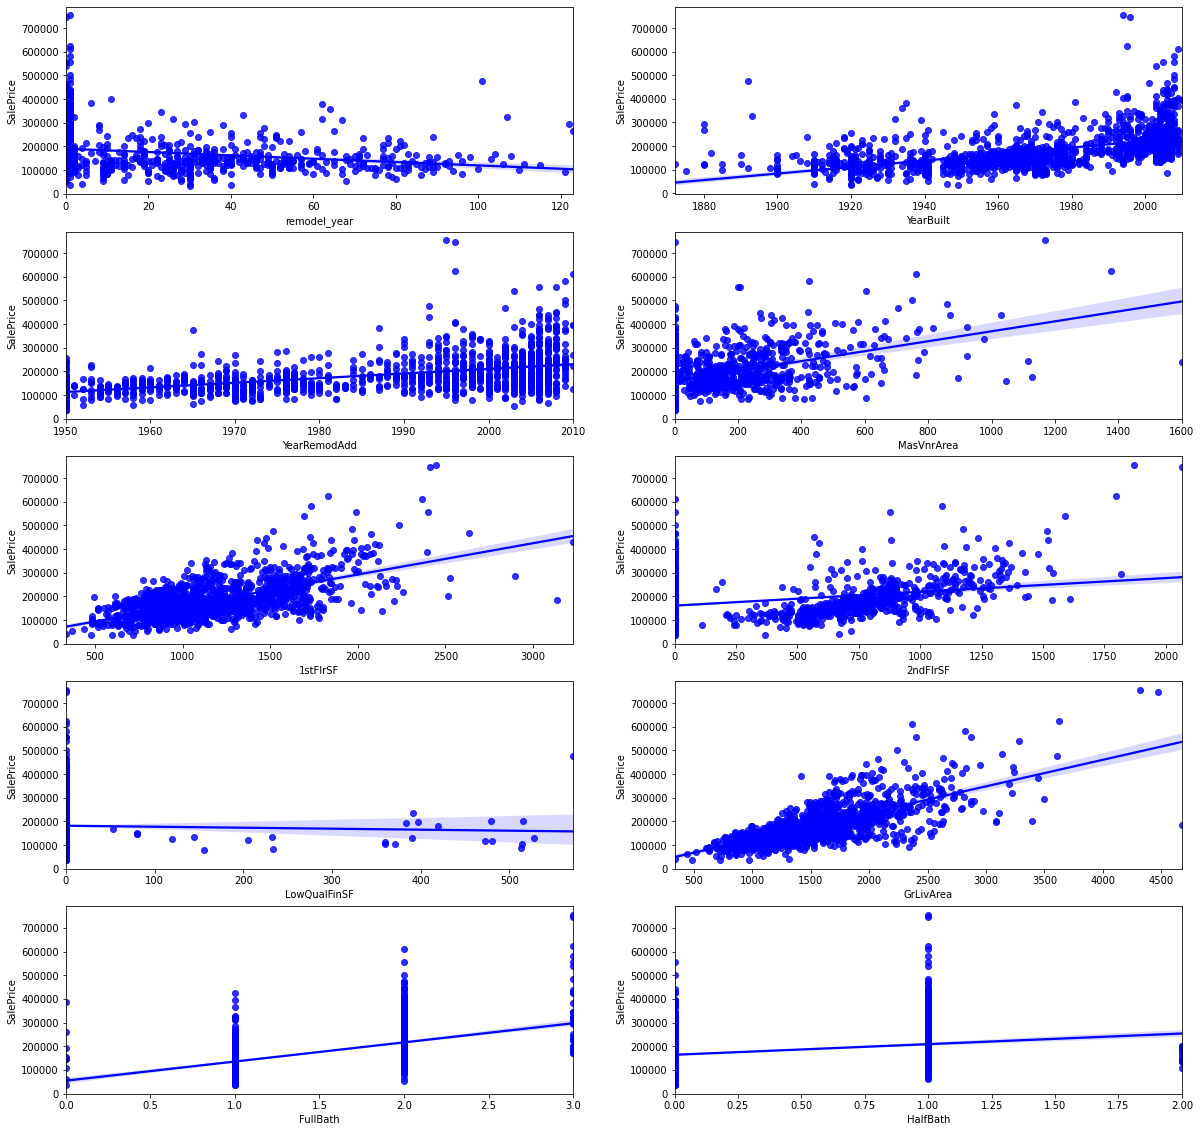

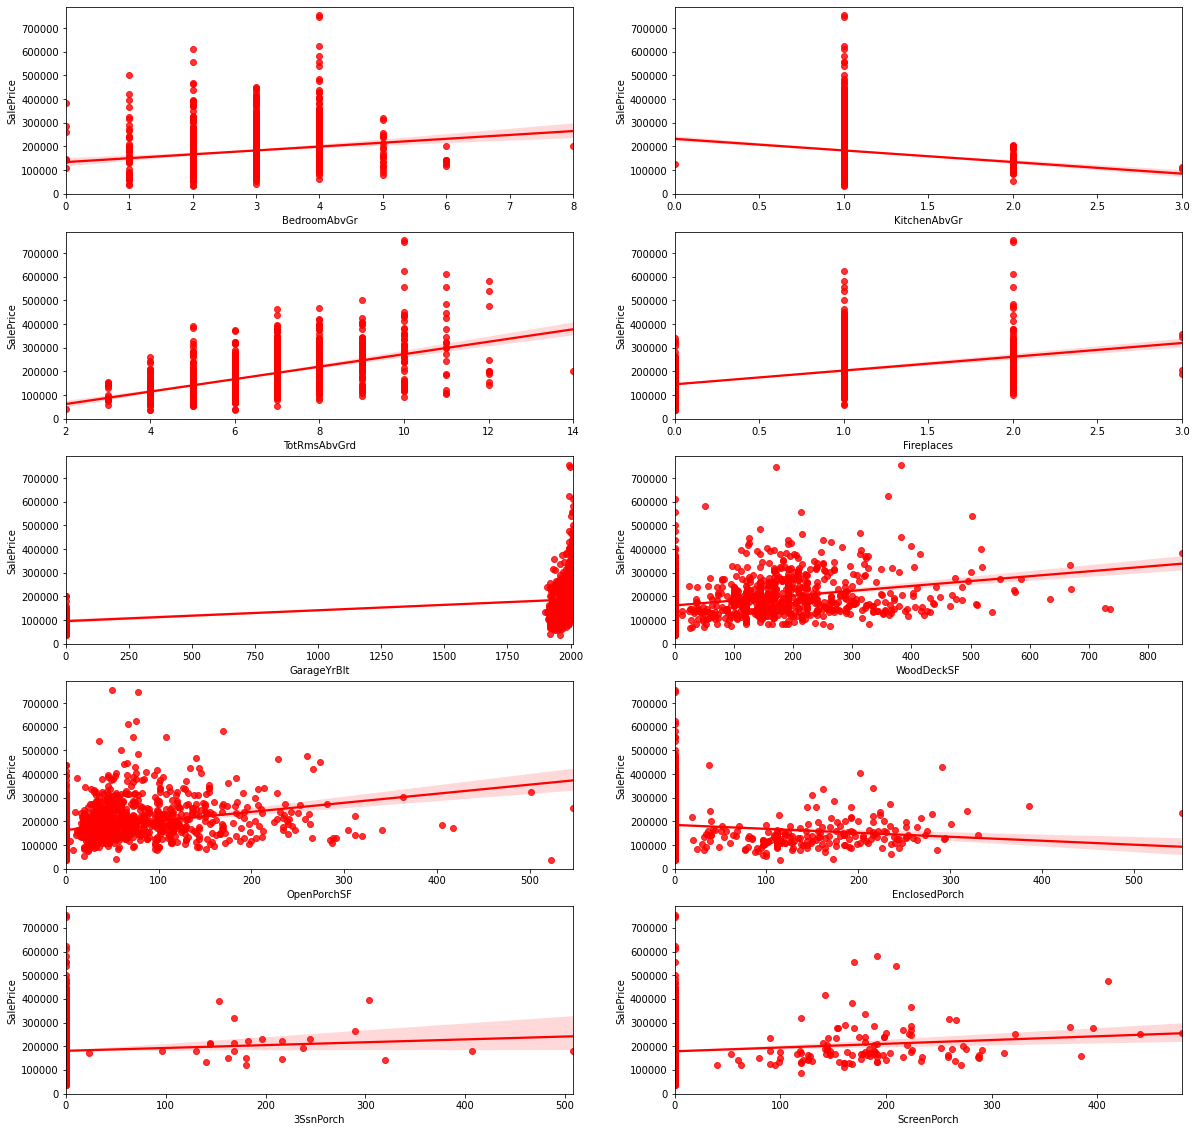

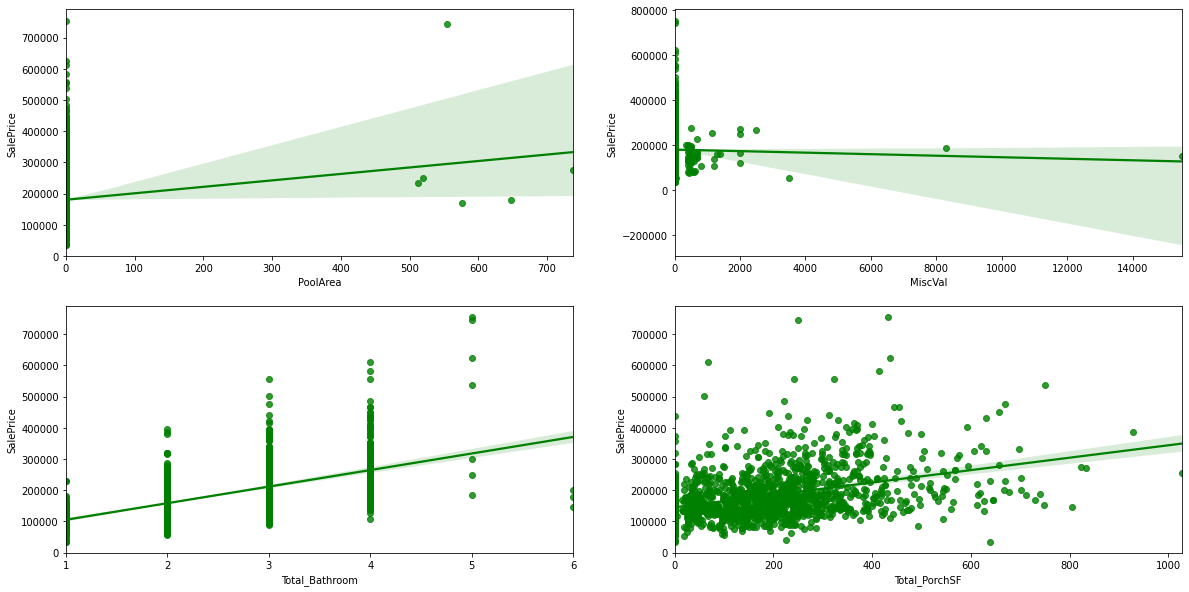

In [39]:
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8), (ax9, ax10)) = plt.subplots(5,2,figsize=(20,20))
sns.regplot(house_all_data['BsmtFinSF1'],house_all_data['SalePrice'],ax=ax1, color='m')
sns.regplot(house_all_data['BsmtFinSF2'],house_all_data['SalePrice'],ax=ax2,color='m')
sns.regplot(house_all_data['BsmtUnfSF'],house_all_data['SalePrice'],ax=ax3,color='m')
sns.regplot(house_all_data['TotalBsmtSF'],house_all_data['SalePrice'],ax=ax4, color='m')
sns.regplot(house_all_data['BsmtFullBath'],house_all_data['SalePrice'],ax=ax5, color='m')
sns.regplot(house_all_data['BsmtHalfBath'],house_all_data['SalePrice'],ax=ax5, color='m')
sns.regplot(house_all_data['GarageCars'],house_all_data['SalePrice'],ax=ax6, color='m')
sns.regplot(house_all_data['Total_SF'],house_all_data['SalePrice'],ax=ax7, color='m')
sns.regplot(house_all_data['Additional_Area'],house_all_data['SalePrice'],ax=ax8, color='m')
sns.regplot(house_all_data['LotFrontage'],house_all_data['SalePrice'],ax=ax9,color='m')
sns.regplot(house_all_data['LotArea'],house_all_data['SalePrice'],ax=ax10,color='m')

fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8), (ax9, ax10)) = plt.subplots(5,2,figsize=(20,20))
sns.regplot(house_all_data['remodel_year'],house_all_data['SalePrice'],ax=ax1,color='b')
sns.regplot(house_all_data['YearBuilt'],house_all_data['SalePrice'],ax=ax2,color='b')
sns.regplot(house_all_data['YearRemodAdd'],house_all_data['SalePrice'],ax=ax3,color='b')
sns.regplot(house_all_data['MasVnrArea'],house_all_data['SalePrice'],ax=ax4,color='b')
sns.regplot(house_all_data['1stFlrSF'],house_all_data['SalePrice'],ax=ax5,color='b')
sns.regplot(house_all_data['2ndFlrSF'],house_all_data['SalePrice'],ax=ax6,color='b')
sns.regplot(house_all_data['LowQualFinSF'],house_all_data['SalePrice'],ax=ax7,color='b')
sns.regplot(house_all_data['GrLivArea'],house_all_data['SalePrice'],ax=ax8,color='b')
sns.regplot(house_all_data['FullBath'],house_all_data['SalePrice'],ax=ax9, color='b')
sns.regplot(house_all_data['HalfBath'],house_all_data['SalePrice'],ax=ax10, color='b')
                
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8), (ax9, ax10)) = plt.subplots(5,2,figsize=(20,20))                
sns.regplot(house_all_data['BedroomAbvGr'],house_all_data['SalePrice'],ax=ax1, color='r')
sns.regplot(house_all_data['KitchenAbvGr'],house_all_data['SalePrice'],ax=ax2, color='r')
sns.regplot(house_all_data['TotRmsAbvGrd'],house_all_data['SalePrice'],ax=ax3, color='r')
sns.regplot(house_all_data['Fireplaces'],house_all_data['SalePrice'],ax=ax4, color='r')
sns.regplot(house_all_data['GarageYrBlt'],house_all_data['SalePrice'],ax=ax5,  color='r')
sns.regplot(house_all_data['WoodDeckSF'],house_all_data['SalePrice'],ax=ax6, color='r')
sns.regplot(house_all_data['OpenPorchSF'],house_all_data['SalePrice'],ax=ax7, color='r')
sns.regplot(house_all_data['EnclosedPorch'],house_all_data['SalePrice'],ax=ax8, color='r')
sns.regplot(house_all_data['3SsnPorch'],house_all_data['SalePrice'],ax=ax9, color='r')
sns.regplot(house_all_data['ScreenPorch'],house_all_data['SalePrice'],ax=ax10,  color='r')

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(20,10)) 
sns.regplot(house_all_data['PoolArea'],house_all_data['SalePrice'],ax=ax1,  color='g')
sns.regplot(house_all_data['MiscVal'],house_all_data['SalePrice'],ax=ax2,  color='g')
sns.regplot(house_all_data['Total_Bathroom'],house_all_data['SalePrice'],ax=ax3,  color='g')
sns.regplot(house_all_data['Total_PorchSF'],house_all_data['SalePrice'],ax=ax4,  color='g')

#### Sale Price Distribution

Another part is, checking the distribution of 'Sale Price'. 

((array([-3.49445689, -3.2502483 , -3.11517499, ...,  3.11517499,
          3.2502483 ,  3.49445689]),
  array([34900., 35311., 37900., ...,    nan,    nan,    nan])),
 (nan, nan, nan))

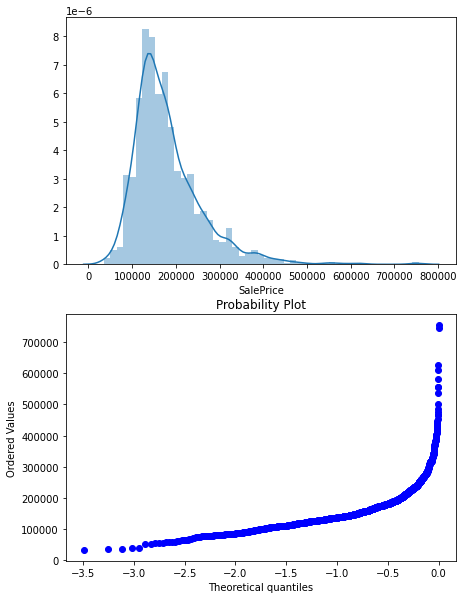

In [40]:
#check distribution of 'Sale Price'
fig, ax =plt.subplots(2,1, figsize=(7, 10))
sns.distplot(house_all_data['SalePrice'], ax=ax[0])
stats.probplot(house_all_data['SalePrice'], plot=plt)

The above distribution graph shows that there is a right-skewed distribution on `Sale Price`. Log transformation was used to make this feature less skewed. This transformation helps to make easier interpretation and better statistical analysis. 
Since division by zero is a problem, log+1 transformation would be better.

In [41]:
house_all_data['SalePrice_log'] = np.log1p(house_all_data['SalePrice'])

((array([-3.49445689, -3.2502483 , -3.11517499, ...,  3.11517499,
          3.2502483 ,  3.49445689]),
  array([10.46027076, 10.47197813, 10.54273278, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

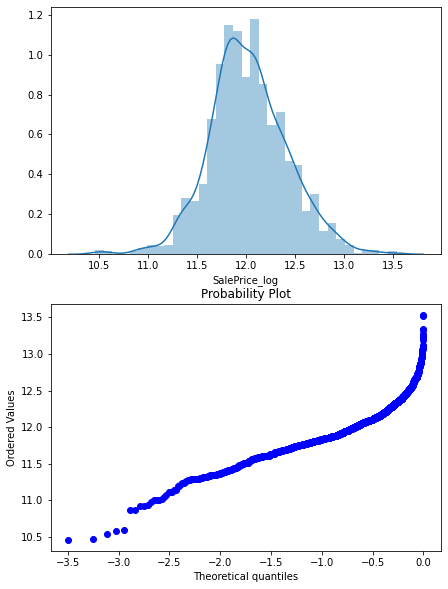

In [42]:
fig, ax =plt.subplots(2,1, figsize=(7, 10))
sns.distplot(house_all_data['SalePrice_log'], ax=ax[0])
stats.probplot(house_all_data['SalePrice_log'],plot=plt)

#### Box-Cox Transformation for Skewed Data

The last part of Feature Engineering is box-cox transformation. Box-cox transformation transforms non-normal variables into a normal shape. 

In [43]:
##Finding skew data
house_numerical_data = house_numerical_data.drop(['SalePrice'], axis=1)
skew_features = house_numerical_data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]

In [44]:
skewness = pd.DataFrame({'Skew' :skew_features})
skewness

,Skew
MiscVal,21.943434
PoolArea,17.691725
LotArea,13.028401
LowQualFinSF,12.086650
3SsnPorch,11.374072
KitchenAbvGr,4.301402
BsmtFinSF2,4.145323
EnclosedPorch,4.003118
ScreenPorch,3.945898
BsmtHalfBath,3.930795


In [45]:
# boxcox_normmax = Compute optimal Box-Cox transform parameter for input data.
for features in high_skew.index:
    house_all_data[features]= boxcox1p(house_all_data[features],  boxcox_normmax(house_all_data[features] + 1))

#### Dropping numerical features

Before model building part;
* `GarageArea` and `SalePrice` features dropped. 
* Train and Test data split again. 

In [46]:
house_all_data= house_all_data.drop(['GarageArea','SalePrice'],axis=1)

In [47]:
#Last step is split train and test set again

train_house_data = house_all_data[:1459]
test_house_data = house_all_data.iloc[1459:]

In [48]:
#Dropped `SalePrice_log` column fromt test data
test_house_data = test_house_data.drop(['SalePrice_log'],axis=1)
test_house_data 

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Fence_MnWw,Fence_not_applicable,Alley_Grvl,Alley_Pave,Alley_not_applicable,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_not_applicable
0,5,20.591103,14.450105,3,5,5,1961,1961,0.000000,3,...,0,0,0,0,1,0,0,0,0,1
1,5,20.751546,14.916765,0,6,5,1958,1958,14.627263,3,...,0,1,0,0,1,1,0,0,0,0
2,10,19.610580,14.845429,0,5,4,1997,1998,0.000000,3,...,0,0,0,0,1,0,0,0,0,1
3,10,20.267727,14.108358,0,6,5,1998,1998,6.153460,3,...,0,1,0,0,1,0,0,0,0,1
4,0,13.902876,12.617817,0,8,4,1992,1992,0.000000,2,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2,8.703583,10.707053,3,4,6,1970,1970,0.000000,3,...,0,1,0,0,1,0,0,0,0,1
1455,2,8.703583,10.664774,3,4,4,1970,1970,0.000000,3,...,0,1,0,0,1,0,0,0,0,1
1456,5,31.603851,15.703886,3,5,6,1960,1996,0.000000,3,...,0,1,0,0,1,0,0,0,0,1
1457,14,17.545732,14.209518,3,5,4,1992,1992,0.000000,3,...,0,0,0,0,1,0,0,1,0,0


## 4. Hyperparameter Tuning

In this part, some hyperparameters were tunned and find the optimum ones for model building. Grid Search method implemented for XGBoost, Light GBM, Gradient Boosting, and SVR models.

In [49]:
# First train and label data created. 
train_data, label_data = train_house_data.iloc[:,:-1],train_house_data.iloc[:,-1]

In [50]:
#Split data randomly to train and test subsets with 70%-30% ratio
X_train, X_test, y_train, y_test = train_test_split(
                                    train_data, label_data, test_size=0.3,random_state=42)

In [51]:
# ##Grid Search - XGBoost

# grid_param = {'n_estimators': [100, 500,1000],
#               'max_depth': [3,5,7], 
#               'objective':['reg:squarederror'],
#               'learning_rate': [0.03, 0.05,0.07],
#               'min_child_weight':[4,5,6],
#               'colsample_bytree':[0.3, 0.5, 0.7]}

    
# # Building Grid Search algorithm with cross-validation and neg-RMSE score.

# xgb_reg_grid = XGBRegressor()
# grid_search = GridSearchCV(estimator=xgb_reg_grid, 
#                            param_grid=grid_param,
#                            scoring='neg_mean_squared_error',
#                            cv=10,
#                            verbose = True,
#                            n_jobs=-1)

# # Finding the best parameters.

# grid_search.fit(X_train, y_train)
# best_parameters = grid_search.best_params_  
# print(best_parameters)

In [52]:
# # Light GBM Grid Search

# gridParams = {
#     'learning_rate': [0.03, 0.05,0.07],
#     'n_estimators': [200,500,1000],
#     'num_leaves': [4,6,8],
#     'colsample_bytree' : [0.3, 0.5, 1],
#     'reg_alpha' : [1, 1.2, 1.4],
#     'reg_lambda' : [1,1.2,1.4],
#     }

# lgb_estimator = lgb.LGBMRegressor()

# grid_search_lgbm = GridSearchCV(estimator=lgb_estimator, 
#                            param_grid=gridParams,
#                            scoring='neg_mean_squared_error',
#                            cv=10,
#                            verbose = True,
#                            n_jobs=-1)

# # Finding the best parameters.

# grid_search_lgbm.fit(X_train, y_train)
# best_parameters_lgbm = grid_search_lgbm.best_params_  
# print(best_parameters_lgbm)

In [53]:
# # Gradient Boosting Grid Search

# gridParams = {
#     'n_estimators':[200,500, 1000], 
#     'learning_rate': [0.1, 0.05, 0.01], 
#     'max_depth':[4,6,8], 
#     'min_samples_leaf':[10,20,30], 
#     'max_features':[1.0,0.3,0.1]}

# gbr_estimator = GradientBoostingRegressor()

# grid_search_gbr = GridSearchCV(estimator=gbr_estimator, 
#                            param_grid=gridParams,
#                            scoring='neg_mean_squared_error',
#                            cv=10,
#                            verbose = True,
#                            n_jobs=-1)

# # Finding the best parameters.

# grid_search_gbr.fit(X_train, y_train)
# best_parameters_gbr = grid_search_gbr.best_params_  
# print(best_parameters_gbr)

In [54]:
# #SVR 
# parameters = {'C': [1, 10, 20, 50, 70, 100],
#               'epsilon' : [0.0004,0.0005,0.0008],
#               'gamma' : [0.0001,0.0002,0.0003]}
# svr = SVR()
# clf = GridSearchCV(estimator = svr, 
#                    param_grid= parameters, 
#                    cv=10,
#                    scoring= 'neg_mean_squared_error',
#                    verbose = True,
#                    n_jobs=-1)

# clf.fit(X_train,y_train)
# clf.best_params_

## 5. Model Building

In this part;
* K-Fold Cross-Validation method used
* XGBoost, Light GBM, Gradient Descent, Ridge, Lasso, Elastic Net, and Support Vector Regressor models have been built.

In [55]:
kfold_cv=KFold(n_splits=15, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(train_data,label_data):
    X_train, X_test = train_data.iloc[train_index], train_data.iloc[test_index]
    y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]

In [56]:
model_xgb= XGBRegressor(colsample_bytree = 0.3,
                        learning_rate = 0.03,
                        max_depth = 5,
                        min_child_weight = 5, 
                        n_estimators = 500,
                        objective ='reg:squarederror')

model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
y_pred_xgbm = model_xgb.predict(X_test)
# print('MAE: %2f'% mean_absolute_error(y_test, y_pred_xgbm))
# print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, y_pred_xgbm)))   
# print('R2 %2f' % r2_score(y_test, y_pred_xgbm))

In [58]:
model_lgbm = lgb.LGBMRegressor(boosting_type ='gbdt', 
                               colsample_bytree = 0.3, 
                               learning_rate = 0.03, 
                               n_estimators = 1000,
                               num_leaves = 6,
                               objective = 'regression', 
                               reg_alpha = 1,
                               reg_lambda = 1.4)
model_lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.3,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=6,
              objective='regression', random_state=None, reg_alpha=1,
              reg_lambda=1.4, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [59]:
y_pred_lgbm = model_lgbm.predict(X_test)
# print('MAE: %2f'% mean_absolute_error(y_test, y_pred_lgbm))
# print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))   
# print('R2 %2f' % r2_score(y_test, y_pred_lgbm))

In [60]:
#Gradient Boosting Regressor

model_gbr= GradientBoostingRegressor(learning_rate=0.01, 
                                     max_depth=6, 
                                     max_features=0.1,
                                     min_samples_leaf=30, 
                                     n_estimators=1000)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)
# print('MAE: %2f'% mean_absolute_error(y_test, y_pred_gbr))
# print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, y_pred_gbr)))   
# print('R2 %2f' % r2_score(y_test, y_pred_gbr))

In [61]:
ridge_alpha = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 
               1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
lasso_alpha = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
enet_alpha = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

In [62]:
rr = make_pipeline(RobustScaler(), RidgeCV(alphas = ridge_alpha, cv=10))
rr.fit(X_train, y_train) 
pred_ridge= rr.predict(X_test)

# print('MAE: %2f'% mean_absolute_error(y_test, pred_ridge))
# print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
# print('R2 %2f' % r2_score(y_test, pred_ridge))

In [63]:
model_lasso = make_pipeline(RobustScaler(), LassoCV(alphas = lasso_alpha, cv=10))
model_lasso.fit(X_train, y_train) 
pred_lasso= model_lasso.predict(X_test)

# print('MAE: %2f'% mean_absolute_error(y_test, pred_lasso))
# print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, pred_lasso)))   
# print('R2 %2f' % r2_score(y_test, pred_lasso))

In [64]:
model_enet = make_pipeline(RobustScaler(),
                           ElasticNetCV(fit_intercept=True, alphas=enet_alpha, cv=10))
model_enet.fit(X_train, y_train) 
pred_enet= model_enet.predict(X_test)

# print('MAE: %2f'% mean_absolute_error(y_test, pred_enet))
# print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, pred_enet)))   
# print('R2 %2f' % r2_score(y_test, pred_enet))

In [65]:
model_svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0001))
model_svr.fit(X_train, y_train) 
pred_svr= model_svr.predict(X_test)

# print('MAE: %2f'% mean_absolute_error(y_test, pred_svr))
# print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, pred_svr)))   
# print('R2 %2f' % r2_score(y_test, pred_svr))

Multiple regression models combine with an ensembling technique.

In [66]:
stack = StackingCVRegressor(regressors=(model_xgb, model_lgbm, model_gbr,rr, model_lasso, model_enet,model_svr),
                            meta_regressor=model_xgb, use_features_in_secondary=True)

In [67]:
stack_model = stack.fit(X_train.values, y_train.values)

## 6. Model Results

Root mean squared error has been calculated for each model. 

In [68]:
print('XGBM– ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbm))))
print('LGBM– ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm))))
print('GBR– ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))))
print('Ridge– ' + str(math.sqrt(metrics.mean_squared_error(y_test, pred_ridge))))
print('Lasso– ' + str(math.sqrt(metrics.mean_squared_error(y_test, pred_lasso))))
print('Elastic Net– ' + str(math.sqrt(metrics.mean_squared_error(y_test, pred_enet))))
print('SVR– ' + str(math.sqrt(metrics.mean_squared_error(y_test, pred_svr))))

XGBM– 0.08026826502051708
LGBM– 0.07766305329024195
GBR– 0.077951162715317
Ridge– 0.0753196836503353
Lasso– 0.07652522328255716
Elastic Net– 0.07528333647253536
SVR– 0.07669214336041494


In this part, a blended model was created with regression models. K-Fold Cross Validation method was implemented before the blending model. 

In [69]:
kfold_cv=KFold(n_splits=10,random_state =42, shuffle=True)

for train_index, test_index in kfold_cv.split(train_data,label_data):
    X_train, X_test = train_data.iloc[train_index], train_data.iloc[test_index]
    y_train, y_test = label_data.iloc[train_index], label_data.iloc[test_index]

In [70]:
def blend_models_predict(X): return ((0.05 * model_xgb.predict(X)) + 
                                     (0.1 * model_lgbm.predict(X)) + 
                                     (0.1 * model_gbr.predict(X)) +  
                                     (0.1 * rr.predict(X)) + 
                                     (0.1 * model_lasso.predict(X)) +
                                     (0.1 * model_enet.predict(X)) +
                                     (0.1 * model_svr.predict(X)) +
                                     (0.35 * stack_model.predict(X.values)))
blend_model_pred = blend_models_predict(X_test)

In [71]:
y_pred_blend = blend_models_predict(X_test)
print('MAE: %2f'% mean_absolute_error(y_test, y_pred_blend))
print('RMSE: %2f'% np.sqrt(mean_squared_error(y_test, y_pred_blend)))   
print('R2 %2f' % r2_score(y_test, y_pred_blend))

MAE: 0.050806
RMSE: 0.066179
R2 0.964246


In [72]:
print('Blend Model– ' + str(math.sqrt(metrics.mean_squared_error(y_test, blend_model_pred))))

Blend Model– 0.06617860865095822
